In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import urllib2
import json

In [2]:
headers = {
    'user-agent': ('Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36'),  # noqa: E501
    'Dnt': ('1'),
    'Accept-Encoding': ('gzip, deflate, sdch'),
    'Accept-Language': ('en'),
    'origin': ('http://stats.nba.com')
    }

In [3]:
def load_nba_dataset_direct_json(json_data):
    data = json_data['resultSets'][0]
    data_frame = pd.DataFrame(data=data["rowSet"], columns=data['headers'])
    return data_frame

def get_page_from_url(url):
    return requests.get(url, headers=headers).json()

In [4]:
last_21_games = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=21&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerOrTeam=Team&PlayerPosition=&PtMeasureType=Efficiency&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [5]:
data_last_21 = load_nba_dataset_direct_json(get_page_from_url(last_21_games))

In [6]:
first_47_games = "http://stats.nba.com/stats/leaguedashptstats?College=&Conference=&Country=&DateFrom=10/18/2017&DateTo=01/22/2018&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PerMode=PerGame&Period=0&PlayerExperience=&PlayerOrTeam=Team&PlayerPosition=&PtMeasureType=Efficiency&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight="

In [7]:
data_first_47 = load_nba_dataset_direct_json(get_page_from_url(first_47_games))

In [10]:
url_advanced_shooting = "http://stats.nba.com/stats/teamgamelogs?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Advanced&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=Totals&Period=0&PlusMinus=N&Rank=N&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&VsConference=&VsDivision="

In [11]:
data_advanced = load_nba_dataset_direct_json(get_page_from_url(url_advanced_shooting))

In [13]:
utah_data_only = data_advanced.loc[data_advanced.TEAM_ABBREVIATION == "UTA"]

In [15]:
utah_data_only.columns

Index([u'SEASON_YEAR', u'TEAM_ID', u'TEAM_ABBREVIATION', u'TEAM_NAME',
       u'GAME_ID', u'GAME_DATE', u'MATCHUP', u'WL', u'MIN', u'OFF_RATING',
       u'DEF_RATING', u'NET_RATING', u'AST_PCT', u'AST_TO', u'AST_RATIO',
       u'OREB_PCT', u'DREB_PCT', u'REB_PCT', u'TM_TOV_PCT', u'EFG_PCT',
       u'TS_PCT', u'PACE', u'PIE', u'GP_RANK', u'W_RANK', u'L_RANK',
       u'W_PCT_RANK', u'MIN_RANK', u'OFF_RATING_RANK', u'DEF_RATING_RANK',
       u'NET_RATING_RANK', u'AST_PCT_RANK', u'AST_TO_RANK', u'AST_RATIO_RANK',
       u'OREB_PCT_RANK', u'DREB_PCT_RANK', u'REB_PCT_RANK', u'TM_TOV_PCT_RANK',
       u'EFG_PCT_RANK', u'TS_PCT_RANK', u'PACE_RANK', u'PIE_RANK'],
      dtype='object')

In [26]:
def add_opponent_stat(data_frame):
    opponent_ts = []
    for i in range(len(data_frame)):
        row = data_frame.iloc[i]
        opponent_game = data_advanced.loc[(data_advanced.TEAM_ABBREVIATION != "UTA") & 
                                          (data_advanced.GAME_ID == row.GAME_ID)]
        opponent_ts.append(opponent_game.TS_PCT.iloc[0])
    data_frame["OPP_TS_PCT"] = opponent_ts

In [27]:
add_opponent_stat(utah_data_only)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
def get_ymd(date):
    """
    Returns year, month and date in integers
    """
    splitted = date.split("-")
    return int(splitted[0]), int(splitted[1]), int(splitted[2])

def classifyGames(data_frame):
    """
    Classifies the game whether they are after big run by Utah or before
    """
    game_classes = []
    colors = []
    for i in range(len(data_frame)):
        curr_row = data_frame.iloc[i]
        date = curr_row.GAME_DATE
        date_only = date.split("T")[0]
        year, month, day = get_ymd(date_only)
        if year <= 2017:
            game_classes.append("Before 20-2 period")
            colors.append("#7badfc")
        elif month <= 1 and day <= 22:
            game_classes.append("Before 20-2 period")
            colors.append("#7badfc")
        elif month == 1 and day > 22:
            game_classes.append("During 20-2 period")
            colors.append("#eaa94d")
        else:
            game_classes.append("During 20-2 period")
            colors.append("#eaa94d")
    data_frame["GAME_CLASS"] = game_classes
    data_frame["COL"] = colors
        
        

In [60]:
classifyGames(utah_data_only)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
plt.style.use('seaborn-whitegrid')

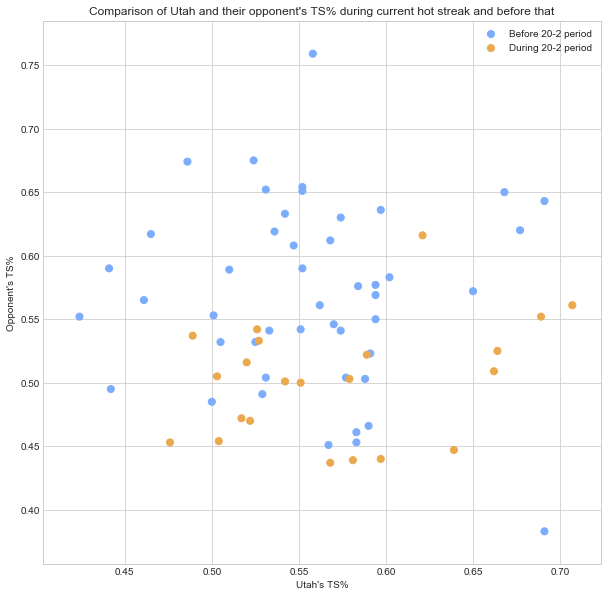

In [74]:
plt.figure(figsize=(10, 10))

before_streak = utah_data_only.loc[utah_data_only.GAME_CLASS == "Before 20-2 period"]
during_streak = utah_data_only.loc[utah_data_only.GAME_CLASS == "During 20-2 period"]
before = plt.scatter(x=before_streak.TS_PCT, y=before_streak.OPP_TS_PCT, s=50, c=before_streak.COL)
during = plt.scatter(x=during_streak.TS_PCT, y=during_streak.OPP_TS_PCT, s=50, c=during_streak.COL)
plt.ylabel("Opponent's TS%")
plt.xlabel("Utah's TS%")
plt.legend((before, during), ("Before 20-2 period", "During 20-2 period"))

title = plt.title("Comparison of Utah and their opponent's TS% during current hot streak and before that")
